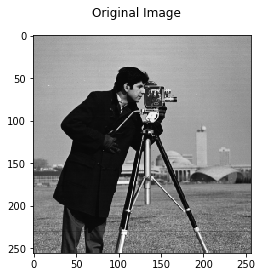

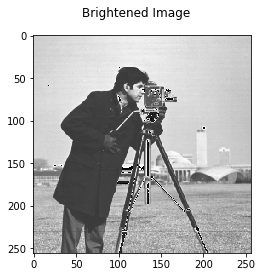

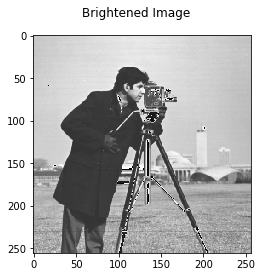

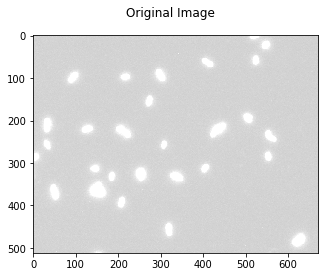

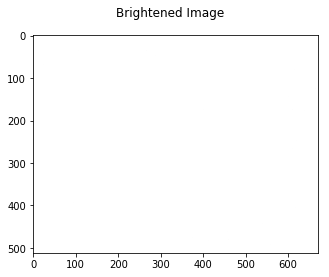

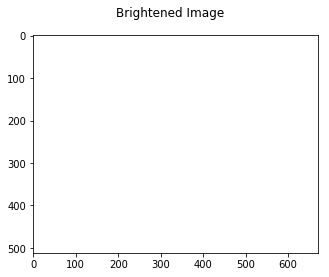

In [22]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# Implement this function
def imadd(pic,brightness=50):
    # Add brightness to each pixel
    for i in range(len(pic)):
        for j in range(len(pic[i])):
            pic[i,j] = pic[i,j] + np.uint(brightness)
    return pic

# Read the image
cameraman_origin = imread('cameraman.tif')
eco_origin = imread('eco.tif')
# Create a copy of the origina image for us to manipulate
cameraman_bright1 = copy.deepcopy(cameraman_origin)
cameraman_bright2 = copy.deepcopy(cameraman_origin)
eco_bright1 = copy.deepcopy(eco_origin)
eco_bright2 = copy.deepcopy(eco_origin)

# Call imadd to perform enhancement
cameraman_bright1 = imadd(cameraman_bright1,50)
cameraman_bright2 = imadd(cameraman_bright2,300)
eco_bright1 = imadd(eco_bright1,50)
eco_bright2 = imadd(eco_bright2,300)

# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(cameraman_origin,cmap='gray',vmin = 0, vmax = 255)
fig_cam_bright1 = plt.figure(2)
fig_cam_bright1.suptitle('+50 Brightened Image')
plt.imshow(cameraman_bright1,cmap='gray',vmin = 0, vmax = 255)
plt.show()
fig_cam_bright2 = plt.figure(3)
fig_cam_bright2.suptitle('+300 Brightened Image')
plt.imshow(cameraman_bright2,cmap='gray',vmin = 0, vmax = 255)
plt.show()

fig_eco_origin = plt.figure(4)
fig_eco_origin.suptitle('Original Image')
plt.imshow(eco_origin,cmap='gray',vmin = 0, vmax = 255)
fig_eco_bright1 = plt.figure(5)
fig_eco_bright1.suptitle('+50 Brightened Image')
plt.imshow(eco_bright1,cmap='gray',vmin = 0, vmax = 255)
plt.show()
fig_eco_bright2 = plt.figure(6)
fig_eco_bright2.suptitle('+300 Brightened Image')
plt.imshow(eco_bright2,cmap='gray',vmin = 0, vmax = 255)
plt.show()

The dynamic range of the orignial image is 0-255. After the brightening procedure, the dynamic range is still 0-255, but the brightest parts of the image have now overflowed and looped back to 0, so any values lower than 50 were originally bright spots. eco.tif is already so bright that it cannot be improved by brightening it more.

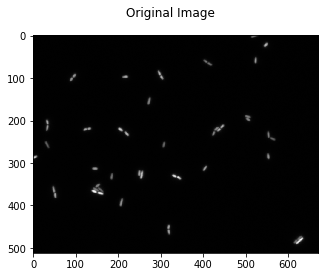

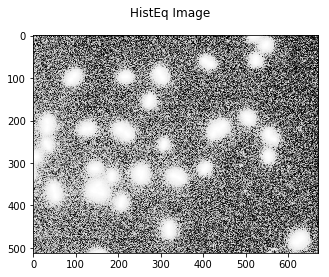

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import exposure
import copy
%matplotlib inline


# Read the image
eco_origin = imread('eco.tif')

# Apply Histogram Equalization here!
eco_histeq = exposure.equalize_hist(eco_origin)

# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(eco_origin,cmap='gray')
fig_cam_bright = plt.figure(2)
fig_cam_bright.suptitle('HistEq Image')
plt.imshow(eco_histeq,cmap='gray')
plt.show()

Once histogram equaization has been done, it doe not help to run it again as the distribution is already even so it cannot be made "more" even.

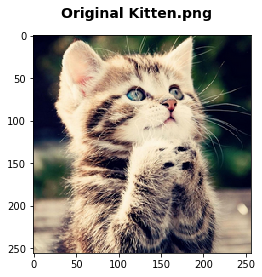

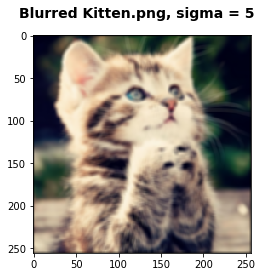

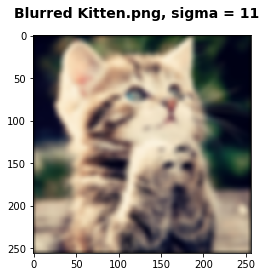

In [31]:
import numpy
from imageio import imread
from scipy import signal
import matplotlib.pyplot as plt

# Gaussian Kernel Following the Descriptiong: 
# http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid')
        return None
    kernel = numpy.zeros((size,size))
    for x in range(size):
        for y in range(size):
            kernel[x][y] = numpy.exp(-((x-(size-1)/2)**2 \
                           +(y-(size-1)/2)**2)/(2*sigma**2))
    kernel = kernel / numpy.sum(kernel)
    return kernel

# Read Image and Display
kitten_origin = imread('kitten.png')
# Create a copy of the origina image for us to manipulate
kitten_blur = copy.deepcopy(kitten_origin)
kitten_blur1 = copy.deepcopy(kitten_origin)
# Generate Kernel
kernel = gengaussian(5)
kernel1 = gengaussian(11)
# Apply Convolution Here!
kitten_blur[:,:,0]=signal.convolve2d(kitten_blur[:,:,0],kernel,mode='same')
kitten_blur[:,:,1]=signal.convolve2d(kitten_blur[:,:,1],kernel,mode='same')
kitten_blur[:,:,2]=signal.convolve2d(kitten_blur[:,:,2],kernel,mode='same')

kitten_blur1[:,:,0]=signal.convolve2d(kitten_blur1[:,:,0],kernel1,mode='same')
kitten_blur1[:,:,1]=signal.convolve2d(kitten_blur1[:,:,1],kernel1,mode='same')
kitten_blur1[:,:,2]=signal.convolve2d(kitten_blur1[:,:,2],kernel1,mode='same')

# Display Results
fig_kitten_origin = plt.figure(1)
fig_kitten_origin.suptitle('Original Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_origin,vmin = 0, vmax = 255)
fig_kitten_blur = plt.figure(2)
fig_kitten_blur.suptitle('Blurred Kitten.png, sigma = 5', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur,vmin = 0, vmax = 255)
plt.show()
fig_kitten_blur1 = plt.figure(3)
fig_kitten_blur1.suptitle('Blurred Kitten.png, sigma = 11', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur1,vmin = 0, vmax = 255)
plt.show()